# Extraction of $m_A$ from the ratio of low to high proton momentum in the selected CCQE-like events

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [7]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/eff_pur/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [4]:
OnBeam = pd.concat([pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_04_'+versions['data date']+'_vertices.csv')
                    ,pd.read_csv(vertices_files_path+'/'+versions['data date']+'/'+versions['OnBeam']+'_05_'+versions['data date']+'_vertices.csv')])
OnBeamFV = sample_in_FV(OnBeam)
print "%d"%len(OnBeam)+' pairs from On-Beam, %d'%len(OnBeamFV)+' in Fiducial Volume'; print_line()

OverlayPairsFV, OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

38163 pairs from On-Beam, 24323 in Fiducial Volume
--------------------------------------------------------------
283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


In [10]:
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIEall),' GENIE interaction'

926088  GENIE interaction


In [11]:
GENIE_CC1p0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_CC1p0pi),'GENIE CC1p0π events'
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π events in overlay'

243732 GENIE CC1p0π events
7304 selected CC1p0π events in overlay


## re-scaling of the cosmic in the overlay, and application of the cuts

In [5]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt & delta phi'
              ]
cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,r'$p_t$ imbalance'
            ]
overlay_scalings = dict()
f_Cosmic=0.909
overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic] = get_samples_scaling( N_total= float(len(OnBeamFV)), f_Cosmic=f_Cosmic, OverlaySubsamples=OverlaySamples)
print 'overlay scalings';pp.pprint(overlay_scalings)
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order
                                                                   ,overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic])
print 'applied cuts to overlay'
reducedOnBeam,BeamOnNumbers = apply_cuts_to_data(OnBeamFV=OnBeamFV,cuts_order=cuts_order)
print 'applied cuts to data'

overlay scalings
{   'N(On) scaling and f(cosmic)=0.91': {   '1mu-1p': 0.024262743077631366,
                                            'CC 1p 0pi': 0.024262743077631366,
                                            'N(Ovelay)/N(On)': 7.667022982362373,
                                            'cosmic': 0.23209992756589928,
                                            'other pairs': 0.024262743077631366}}
applied cuts to overlay
applied cuts to data


## The $CC 1p 0 \pi$ purity and efficiency as a function of all kinematical variables

In [6]:
selected_events = reducedOnBeam['Pt & delta phi']
print len(selected_events),'selected pairs in data'
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type] = reducedOverlay['Pt & delta phi'][pair_type]
selected_CC1p0pi = selected_overlay['CC 1p 0pi']
print len(selected_CC1p0pi),'selected CC1p0π pairs in overlay'

350 selected pairs in data
7304 selected CC1p0π pairs in overlay


## Add $\cos \theta$ to samples

In [24]:
GENIE_CC1p0pi['truth_Pp_cos_theta'] = np.cos(GENIE_CC1p0pi['truth_Pp_theta'])
GENIE_CC1p0pi['truth_Pmu_cos_theta'] = np.cos(GENIE_CC1p0pi['truth_Pmu_theta'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
for cut in cuts_order:
    for pair_type in pair_types:
        reducedOverlay[cut][pair_type]['reco_Pp_cos_theta'] = np.cos(reducedOverlay[cut][pair_type]['reco_Pp_theta'])
        reducedOverlay[cut][pair_type]['reco_Pmu_cos_theta'] = np.cos(reducedOverlay[cut][pair_type]['reco_Pmu_theta'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
selected_CC1p0pi['reco_Pp_cos_theta'] = np.cos(selected_CC1p0pi['reco_Pp_theta'])
selected_CC1p0pi['reco_Pmu_cos_theta'] = np.cos(selected_CC1p0pi['reco_Pmu_theta'])
selected_CC1p0pi['truth_Pp_cos_theta'] = np.cos(selected_CC1p0pi['truth_Pp_theta'])
selected_CC1p0pi['truth_Pmu_cos_theta'] = np.cos(selected_CC1p0pi['truth_Pmu_theta'])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/eff_pur/Pp_purity_after_cuts.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/eff_pur/Pp_cos_theta_purity_after_cuts.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/eff_pur/Pmu_purity_after_cuts.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/eff_pur/Pmu_cos_theta_purity_after_cuts.pdf


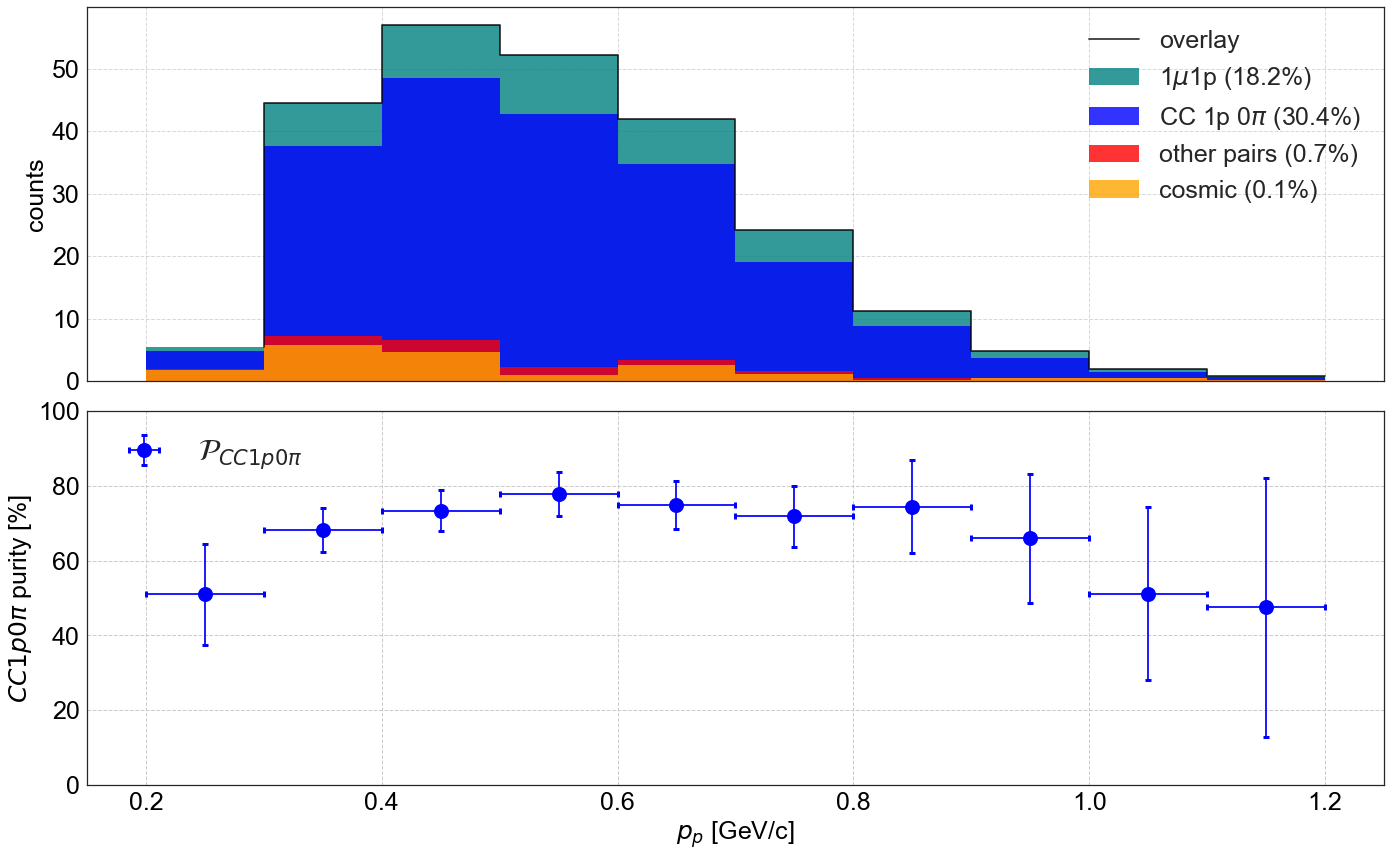

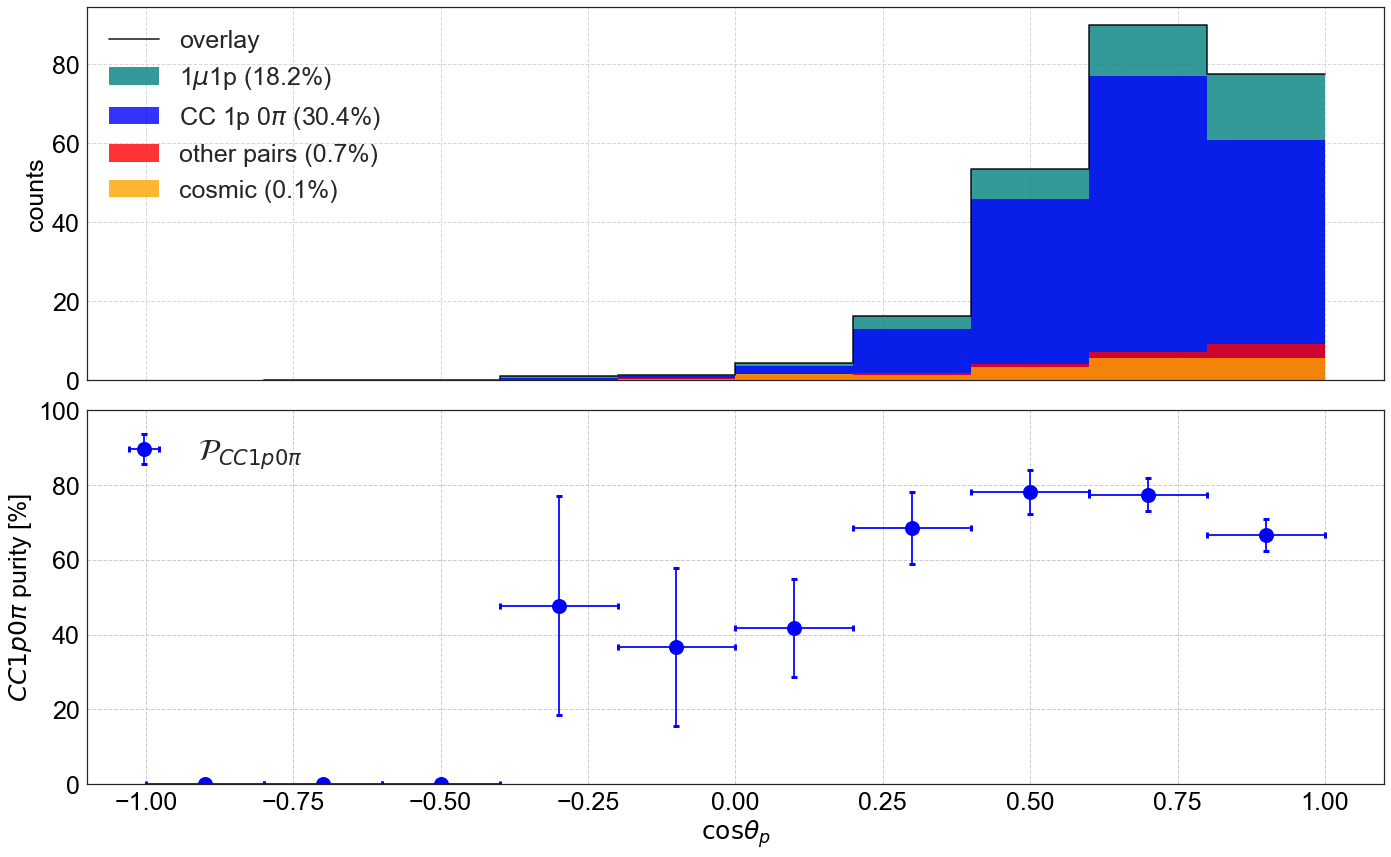

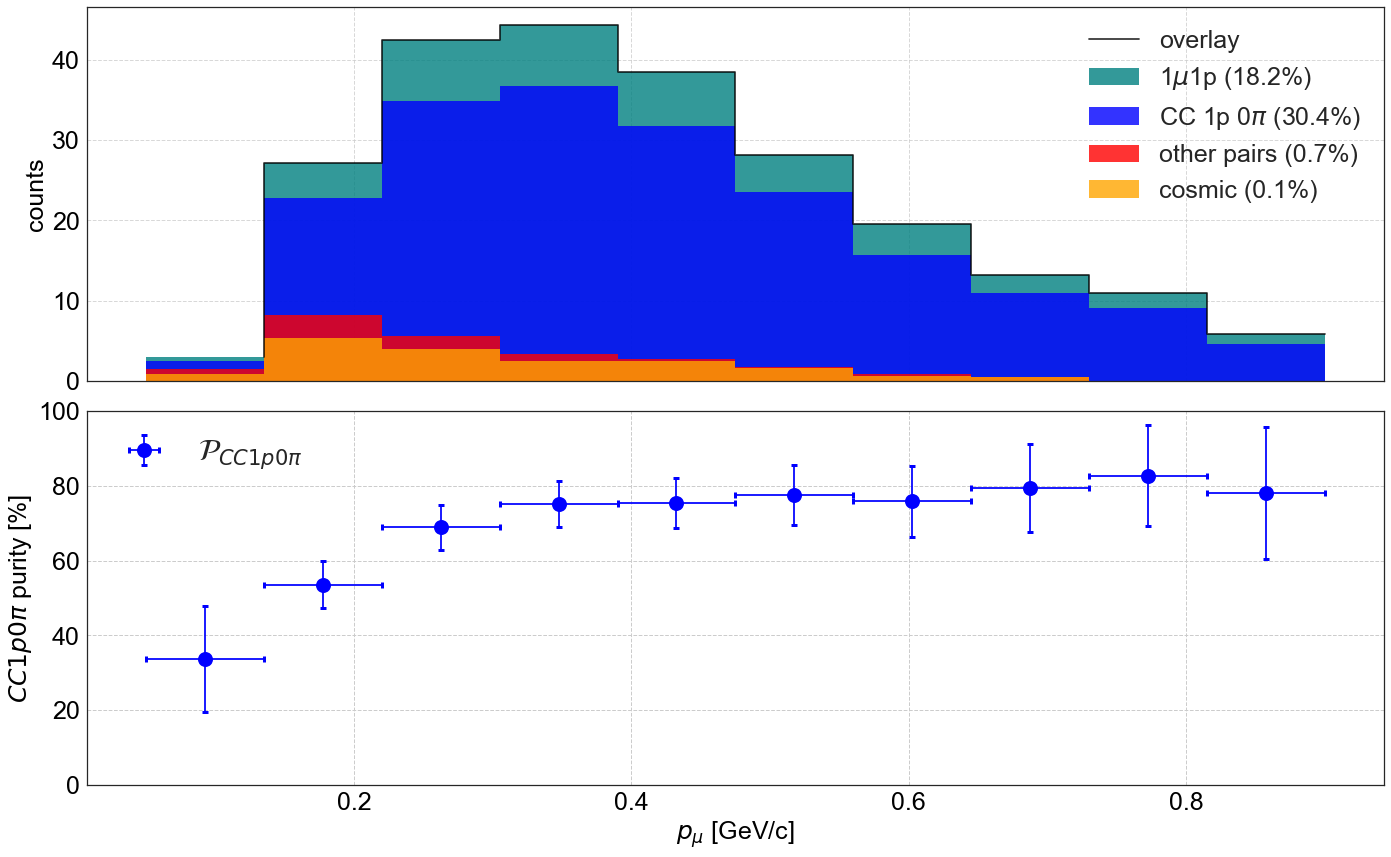

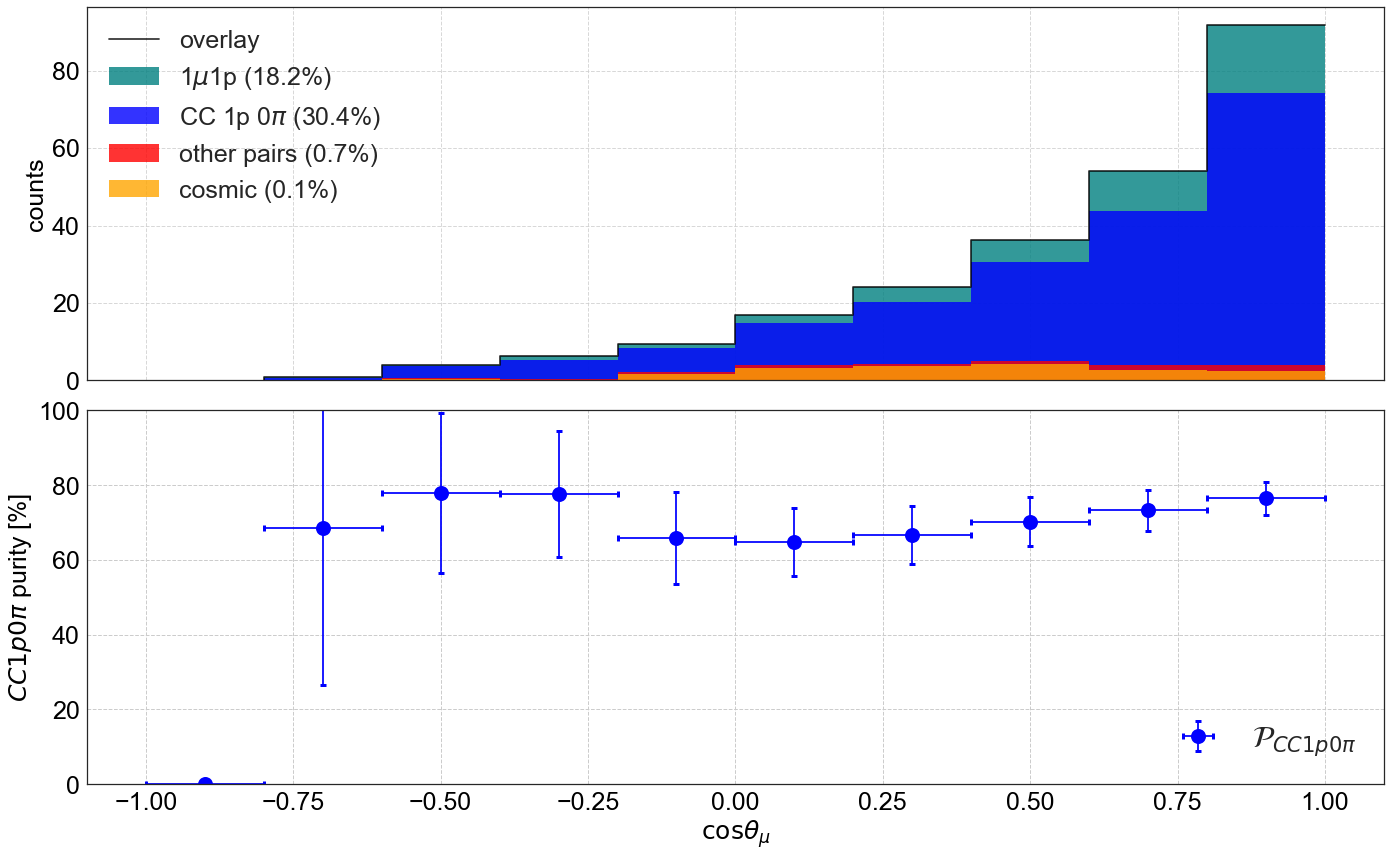

In [28]:
for var,x_label,bins in zip(['Pp','Pp_cos_theta','Pmu','Pmu_cos_theta']
                            ,[r'$p_{p}$ [GeV/c]',r'$\cos\theta_{p}$',r'$p_{\mu}$ [GeV/c]',r'$\cos\theta_{\mu}$']
                            ,[linspace(0.2,1.2,11),linspace(-1,1,11),linspace(0.05,0.9,11),linspace(-1,1,11)]):

    bin_width=0.5*(bins[1]-bins[0])
    xlim=(np.min(bins)-0.5*bin_width,np.max(bins)+0.5*bin_width)
    fig=plt.figure(figsize=(19.416,12))
    ax = fig.add_subplot(2,1,1)
    h_stack,_=plot_stacked_MCsamples( reducedOverlay=reducedOverlay,cut_name='Pt & delta phi'
                                     , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
                                     , ax=ax, var='reco_'+var, x_label='',y_label='counts', bins=bins 
                                     , remove_ticks_x=True
                                     , fontsize=25, stackColor='black',stackLabel='overlay'
                                  );
    ax.legend(fontsize=25)
    ax = fig.add_subplot(2,1,2)
    mid,purity,purity_err = plot_purity( OverlaySamples=selected_overlay,debug=0               
                , overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]                               
                , ax=ax, var='reco_'+var, bins=bins 
                , purity_pair_type='CC 1p 0pi'            
                , x_label=x_label, y_label=r'$CC1p0\pi$ purity [%]'                            
                , color='blue', ecolor='blue',label=r'$\mathcal{P}_{CC 1p 0\pi}$'
               );
    plt.legend(fontsize=30)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.08)
    save_figure(figures_path + var + '_purity_after_cuts.pdf')

# The $CC1p0\pi$ efficiency is taken from the entire sample of $CC1p0\pi$ events in the overlay

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/eff_pur/Pp_efficiency_after_cuts.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/eff_pur/Pp_cos_theta_efficiency_after_cuts.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/eff_pur/Pmu_efficiency_after_cuts.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/eff_pur/Pmu_cos_theta_efficiency_after_cuts.pdf


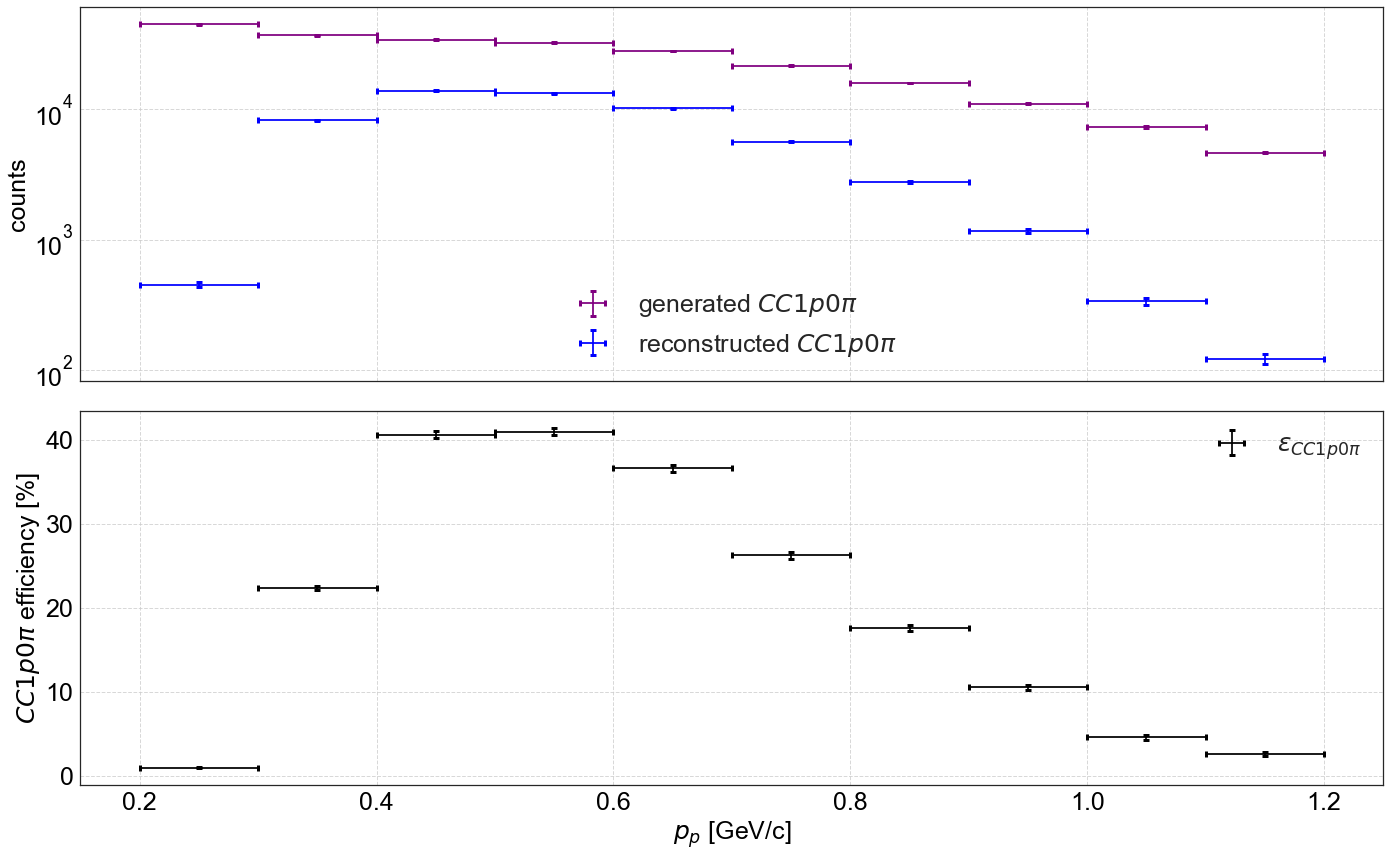

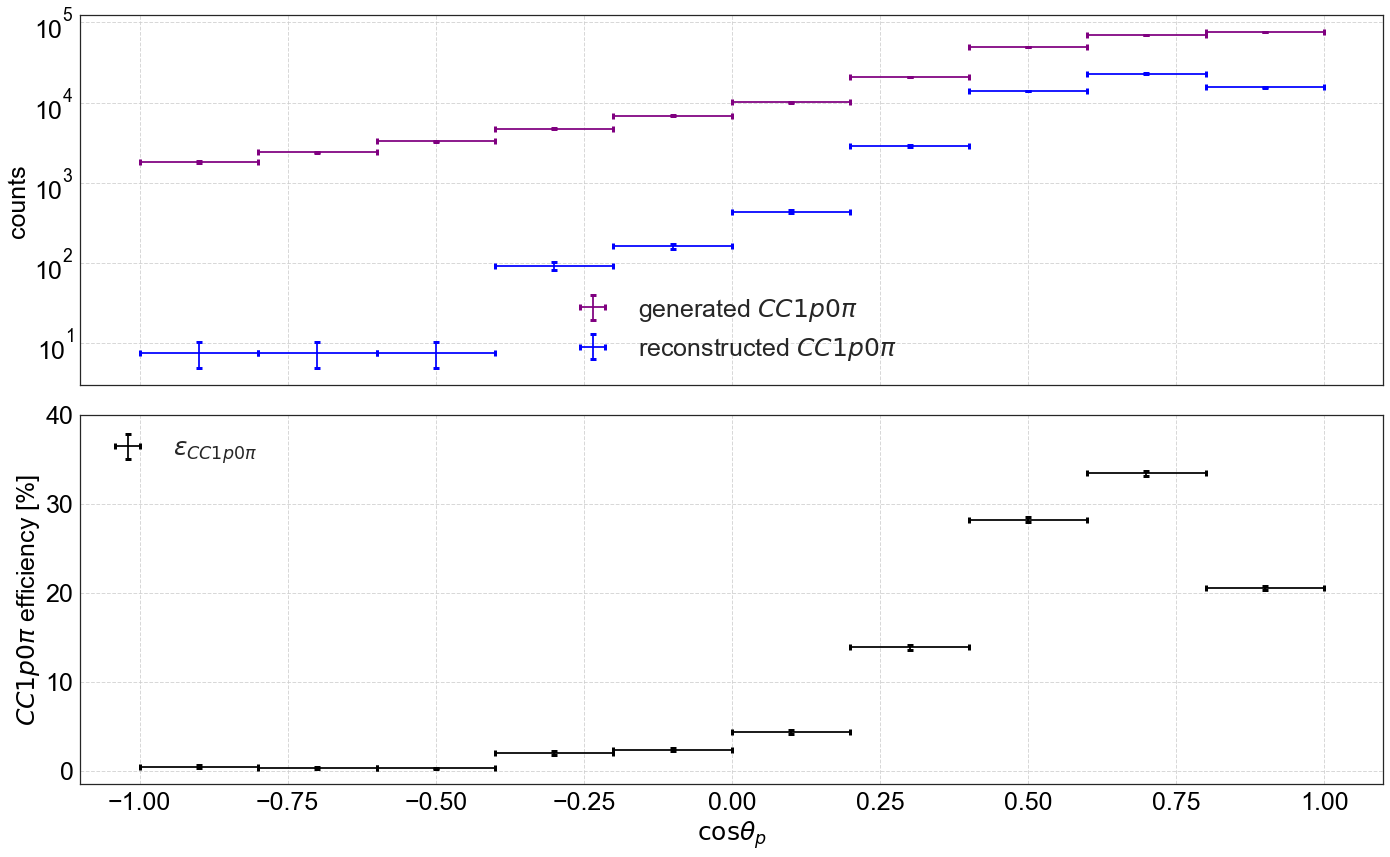

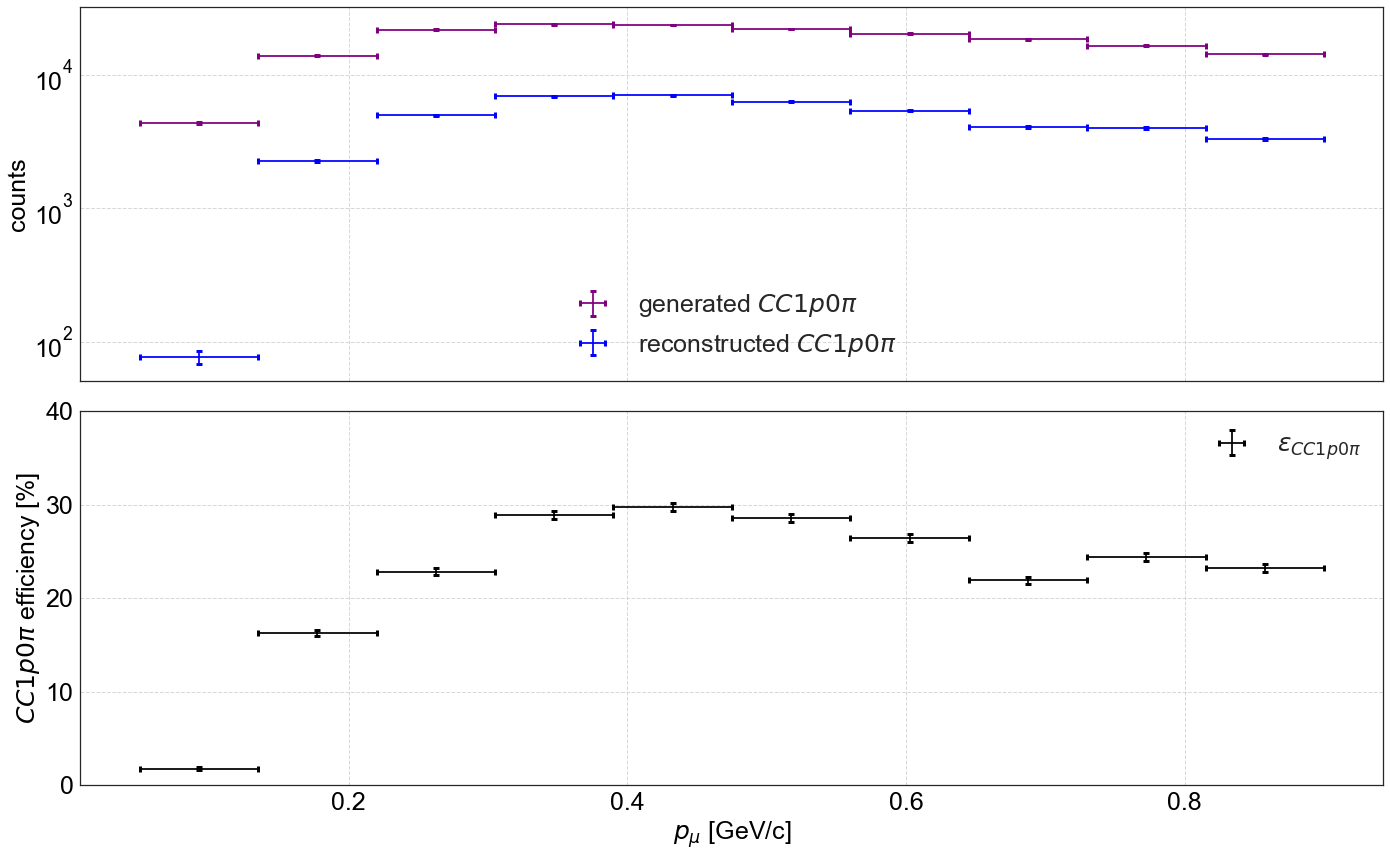

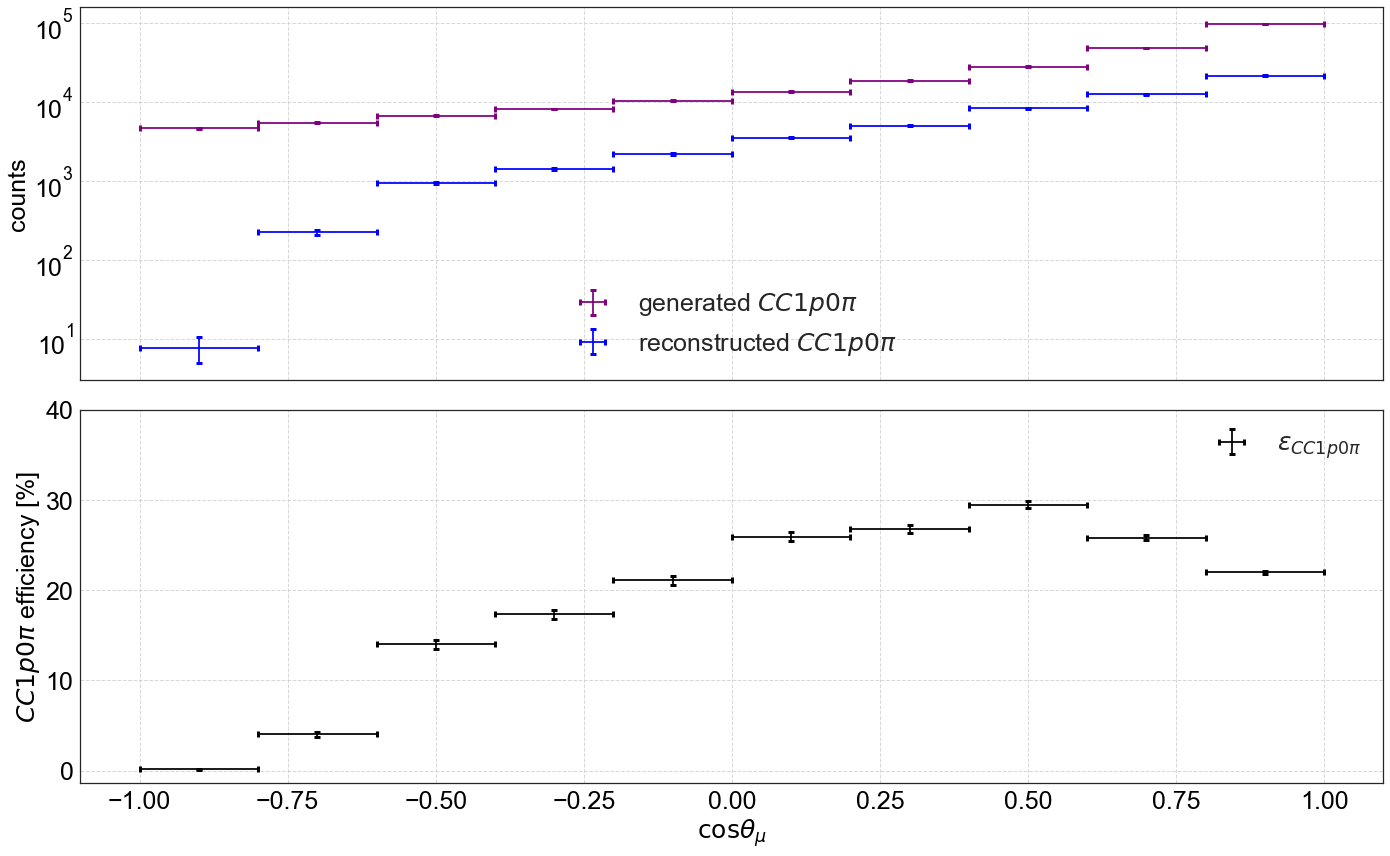

In [30]:
for var,x_label,bins in zip(['Pp','Pp_cos_theta','Pmu','Pmu_cos_theta']
                            ,[r'$p_{p}$ [GeV/c]',r'$\cos\theta_{p}$',r'$p_{\mu}$ [GeV/c]',r'$\cos\theta_{\mu}$']
                            ,[linspace(0.2,1.2,11),linspace(-1,1,11),linspace(0.05,0.9,11),linspace(-1,1,11)]):


    bin_width=0.5*(bins[1]-bins[0])
    xlim=(np.min(bins)-0.5*bin_width,np.max(bins)+0.5*bin_width)

    overlay_scaling=overlay_scalings['N(On) scaling and f(cosmic)=%.2f'%f_Cosmic]
    fig=plt.figure(figsize=(19.416,12))
    ax = fig.add_subplot(2,1,1)
    h = dict()
    for sam,sname,slabel,color in zip([GENIE_CC1p0pi,selected_CC1p0pi]
                                      ,['gen','rec']
                                      ,['generated $CC 1p 0\pi$','reconstructed $CC 1p 0\pi$']                               
                                      ,['purple','blue']):
        h[sname],edges = np.histogram(sam['truth_'+var],bins=bins)
        if sname=='rec':
            h[sname] = h[sname]*overlay_scaling['N(Ovelay)/N(On)']
        mid = 0.5*(edges[1:]+edges[:-1])
        bin_width=0.5*(edges[1]-edges[0])
        plt.errorbar(x=mid,xerr=bin_width,y=h[sname],yerr=np.sqrt(h[sname]),color=color
                     ,markersize=2,fmt='s',capsize=3,capthick=3,label=slabel)
    set_axes(ax, x_label='', y_label=r'counts',remove_ticks_x=True
             ,do_add_grid=True,do_add_legend=True,legend_loc='lower center')
    ax.set_yscale('log')

    eff = h['rec']/h['gen']
    eff_err = eff * np.sqrt(1./h['rec'] + 1./h['gen'])

    ax = fig.add_subplot(2,1,2)
    plt.errorbar(x=mid , xerr=bin_width , y=100*eff , yerr=100*eff_err , color='black'
                 ,markersize=2,fmt='s',capsize=3,capthick=3,label=r'$\epsilon_{CC 1p 0\pi}$')
    set_axes(ax, x_label=x_label
             , y_label=r'$CC1p0\pi$ efficiency [%]',yticks=[0,10,20,30,40]
             ,do_add_grid=True,do_add_legend=True,legend_loc='best')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.08)
    save_figure(figures_path + var + '_efficiency_after_cuts.pdf')